In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import activations
from keras.layers.core import Dense
from keras.layers.core import Flatten


Using TensorFlow backend.


In [2]:
class_names_1 = ['-2', '-1', '0','1', '2']
class_names_3 = ['-3','-2', '-1', '0','1', '2','3']

In [3]:
temp = sio.loadmat('train_set.mat')
train_set = temp['Wh']
temp = sio.loadmat('train_label.mat')
train_label = temp['W']
temp = sio.loadmat('test_data_1.mat')
test_set_1 = temp['Wh']
temp = sio.loadmat('test_label_1.mat')
test_label_1 = temp['W']

temp = sio.loadmat('test_data_3.mat')
test_set_3 = temp['Wh']
temp = sio.loadmat('test_label_3.mat')
test_label_3 = temp['W']

In [4]:
train_label = train_label.flatten()

In [5]:
train_set.shape

(100000, 2, 33)

In [6]:
test_set_1.shape

(10000, 2, 33)

In [7]:
test_label_1 = test_label_1.flatten()
test_label_3 = test_label_3.flatten()


In [8]:
x = train_set.reshape(100000,2,33,1)
y = train_label

In [9]:
y[0]

2.0

In [10]:
index = np.arange(100000)
np.random.shuffle(index)
 
X_train=x[index,:,:,:] #X_train是训练集，y_train是训练标签
y_train=y[index]
index

array([37092, 16050, 59386, ..., 83646, 22128, 49297])

In [11]:
y_train[0]

-1.0

In [12]:
model = Sequential()
model.add(Conv2D(40,(2,2),strides=(1,1),padding='valid',activation="relu",input_shape=(2,33,1)))
model.add(Conv2D(1,(1,1),strides=1,padding='valid',activation="relu",input_shape=(1,32)))
model.add(Flatten())
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="linear"))

In [13]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss='mean_squared_error',metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 32, 40)         200       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 32, 1)          41        
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 310
Trainable params: 310
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train, y_train,batch_size=50,epochs=100,validation_split=0.1,shuffle=True)

Train on 90000 samples, validate on 10000 samples
Epoch 1/100
90000/90000 [==============================] - 3s 31us/step - loss: 0.4044 - acc: 0.6734 - val_loss: 0.0956 - val_acc: 0.8945
Epoch 2/100
90000/90000 [==============================] - 3s 31us/step - loss: 0.0864 - acc: 0.9166 - val_loss: 0.0827 - val_acc: 0.9233
Epoch 3/100
90000/90000 [==============================] - 3s 29us/step - loss: 0.0755 - acc: 0.9396 - val_loss: 0.0708 - val_acc: 0.9523
Epoch 4/100
90000/90000 [==============================] - 3s 31us/step - loss: 0.0707 - acc: 0.9488 - val_loss: 0.0778 - val_acc: 0.9198
Epoch 5/100
90000/90000 [==============================] - 3s 30us/step - loss: 0.0686 - acc: 0.9515 - val_loss: 0.0656 - val_acc: 0.9605
Epoch 6/100
90000/90000 [==============================] - 3s 29us/step - loss: 0.0673 - acc: 0.9520 - val_loss: 0.0677 - val_acc: 0.9504
Epoch 7/100
90000/90000 [==============================] - 3s 30us/step - loss: 0.0659 - acc: 0.9532 - val_loss: 0.0638 - 

90000/90000 [==============================] - 2s 27us/step - loss: 0.0610 - acc: 0.9467 - val_loss: 0.0692 - val_acc: 0.9325
Epoch 60/100
90000/90000 [==============================] - 2s 27us/step - loss: 0.0611 - acc: 0.9458 - val_loss: 0.0594 - val_acc: 0.9483
Epoch 61/100
90000/90000 [==============================] - 2s 28us/step - loss: 0.0611 - acc: 0.9458 - val_loss: 0.0593 - val_acc: 0.9491
Epoch 62/100
90000/90000 [==============================] - 2s 28us/step - loss: 0.0613 - acc: 0.9455 - val_loss: 0.0628 - val_acc: 0.9419
Epoch 63/100
90000/90000 [==============================] - 2s 27us/step - loss: 0.0610 - acc: 0.9459 - val_loss: 0.0635 - val_acc: 0.9407
Epoch 64/100
90000/90000 [==============================] - 2s 27us/step - loss: 0.0612 - acc: 0.9455 - val_loss: 0.0598 - val_acc: 0.9473
Epoch 65/100
90000/90000 [==============================] - 2s 27us/step - loss: 0.0611 - acc: 0.9462 - val_loss: 0.0608 - val_acc: 0.9468
Epoch 66/100
90000/90000 [==============

In [16]:
test_set_1.shape

(10000, 2, 33)

In [17]:
test_set_3.shape

(3000, 2, 33)

In [18]:
test_set_1 = test_set_1.reshape(10000,2,33,1)
test_set_3 = test_set_3.reshape(3000,2,33,1)

In [19]:
test_loss, test_acc = model.evaluate(test_set_1, test_label_1)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 20us/step
Test accuracy: 0.9507


In [20]:
test_loss, test_acc = model.evaluate(test_set_3, test_label_3)
print('Test accuracy:', test_acc)

3000/3000 [==============================] - 0s 26us/step
Test accuracy: 0.9713333333333334


In [22]:
predictions_1 = model.predict(test_set_1)

In [23]:
predictions_1 = predictions_1.flatten()

In [24]:
test_label_1.shape

(10000,)

In [25]:
predictions_1 = np.rint(predictions_1)
predictions_1 = predictions_1.astype(int)

In [26]:
predictions_1[16]

-2

In [27]:
test_label_1 = test_label_1.astype(int)

In [28]:
test_label_1[16]

-2

In [29]:
def plot_image_1(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i]+2, true_label[i]+2, img[i,:,:,0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = predictions_array
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} ({})".format(class_names_1[predicted_label],
                                class_names_1[true_label]),
                                color=color)

def plot_value_array_1(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i]+2, true_label[i]+2
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(5), 1, color="#777777")
  plt.ylim([0, 1])
  predicted_label = predictions_array

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def plot_image_3(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i]+3, true_label[i]+3, img[i,:,:,0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = predictions_array
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} ({})".format(class_names_3[predicted_label],
                                class_names_3[true_label]),
                                color=color)

def plot_value_array_3(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i]+3, true_label[i]+3
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(7), 1, color="#777777")
  plt.ylim([0, 1])
  predicted_label = predictions_array

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

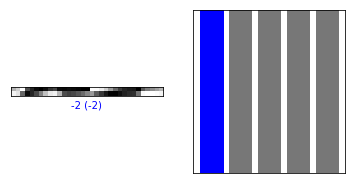

In [30]:
i = 16
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image_1(i, predictions_1, test_label_1, test_set_1)
plt.subplot(1,2,2)
plot_value_array_1(i, predictions_1,  test_label_1)

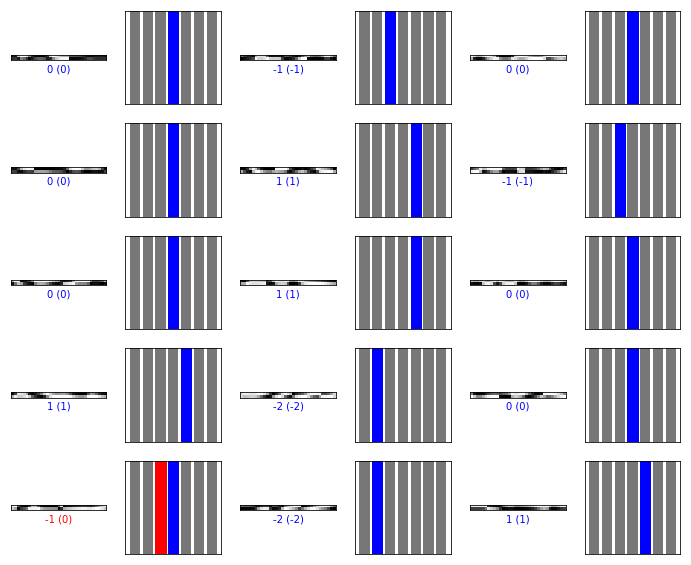

In [31]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image_3(i, predictions_1, test_label_1, test_set_1)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array_3(i, predictions_1, test_label_1)

In [32]:
predictions_3 = model.predict(test_set_3)

In [33]:
predictions_3 = predictions_3.flatten()

In [34]:
predictions_3 = np.rint(predictions_3)
predictions_3 = predictions_3.astype(int)

In [35]:
test_label_3 = test_label_3.astype(int)

In [36]:
predictions_3[4]

3

In [37]:
test_label_3[4]

3

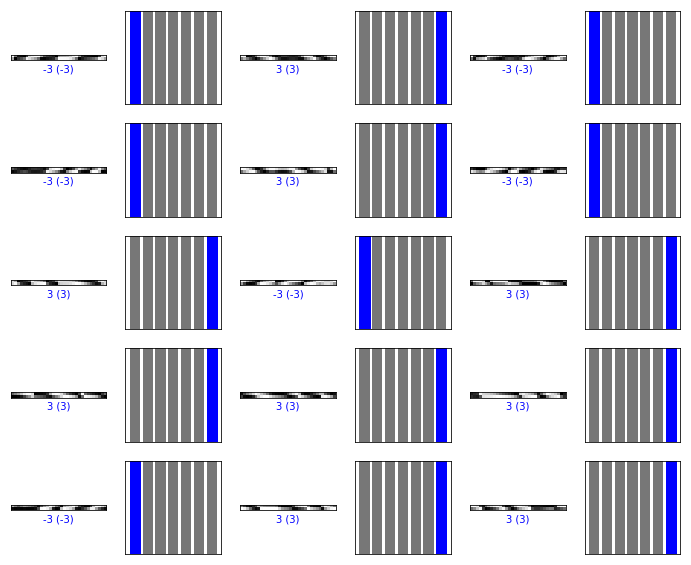

In [38]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image_3(i, predictions_3, test_label_3, test_set_3)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array_3(i, predictions_3, test_label_3)